In [36]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

(168, 299)
This is mask 2  24124


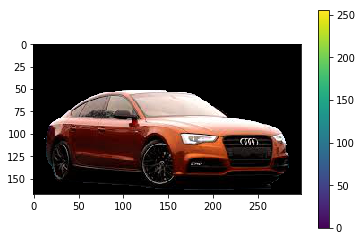

In [37]:
# defining the rectangles dimension
low_x = 10
low_y = 30
high_x = 300
high_y = 200


# path of the input image
path_2 = 'car_2.jpeg'
path = 'car.jpeg'
image = cv2.imread(path)
image_2 = cv2.imread(path_2)

# A simple mask of the shape of image,in the desired return type.
# The user can give information about the expected background and foreground
# beforehand by marking them in the mask before hand
mask = np.zeros(image.shape[:2], np.uint8)

# Two general arrays used by the algorithm internally 
bgdModel = np.zeros((1,65), np.float64)
fwdModel = np.zeros((1,65), np.float64)

# Lower left vetex coordinate followed by upper right coordinate 
# for defining the rectangle
rect = (low_x, low_y, high_x, high_y)

# Calling the function 
cv2.grabCut(image, mask, rect, bgdModel, fwdModel, 5, cv2.GC_INIT_WITH_RECT)
#print("After applying grabcut")
#print(mask[:])

# In the new mask image, pixels will be marked with four flags  
# four flags denote the background / foreground  
# mask is changed, all the 0 and 2 pixels are converted to the background 
# mask is changed, all the 1 and 3 pixels are now the part of the foreground 
# the return type is also mentioned, this gives us the final mask 
mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8') 
print(np.shape(mask2))
print("This is mask 2 ", mask2.sum() )

# The final mask is multiplied with  
# the input image to give the segmented image. 
image_seg = image * mask2[:, :, np.newaxis] 
   
# output segmented image with colorbar 
plt.imshow(image)
plt.imshow(image_seg) 
plt.colorbar() 
plt.show() 
